<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning/blob/main/Data_Augmentation_in_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation


Data Augmentation is a regularization technique used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. It helps improve the generalization ability of Convolutional Neural Networks (CNNs) and reduces overfitting.

It is especially useful when:
- The dataset is small or imbalanced
- The model is overfitting to training data
- You want to make the model invariant to different input transformations

---

## Common Data Augmentation Techniques

1. **Flipping**
   - Horizontal or vertical flips of images.
   - Useful for symmetric data like faces, animals, etc.

2. **Rotation**
   - Rotates the image by a small degree (e.g., -20 to +20 degrees).
   - Helps the model learn orientation invariance.

3. **Zooming**
   - Randomly zooms into the image.
   - Forces the model to learn object features at various scales.

4. **Shifting**
   - Translates the image in horizontal and/or vertical directions.
   - Helps the model become invariant to object position.

5. **Shearing**
   - Applies shearing transformations.
   - Changes the shape of the object in the image.

6. **Brightness and Contrast Adjustment**
   - Simulates different lighting conditions.

7. **Noise Injection**
   - Adds random noise to the image.
   - Improves robustness to real-world noise.

---

## Benefits of Data Augmentation

- Improves model generalization
- Reduces overfitting
- Mimics real-world variations
- Increases effective dataset size

---

##Best Practices

- Always apply augmentation only on the training set, not on validation or test sets.
- Tune augmentation parameters carefully; excessive transformations can distort the input data.
- Combine augmentation with techniques like Dropout, Batch Normalization, and regularization for better performance.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


In [3]:
filename = list(uploaded.keys())[0]

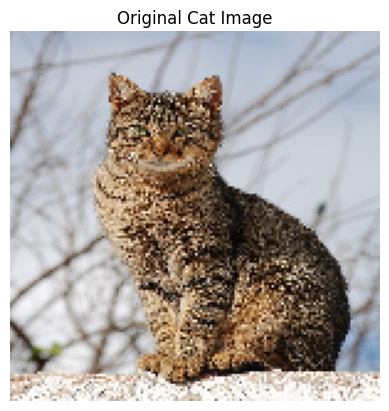

In [4]:
# Load and resize image
img = load_img(filename, target_size=(150, 150))
plt.imshow(img)
plt.title("Original Cat Image")
plt.axis('off')
plt.show()

In [5]:
# Convert Image to Array
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels)

In [6]:
# Define Image Augmentation Generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [7]:
# Generate and Plot Augmented Images
augmented_images = []
for batch in datagen.flow(x, batch_size=1):
    augmented_images.append(batch[0].astype('uint8'))
    if len(augmented_images) == 9:  # Show 9 augmented samples
        break

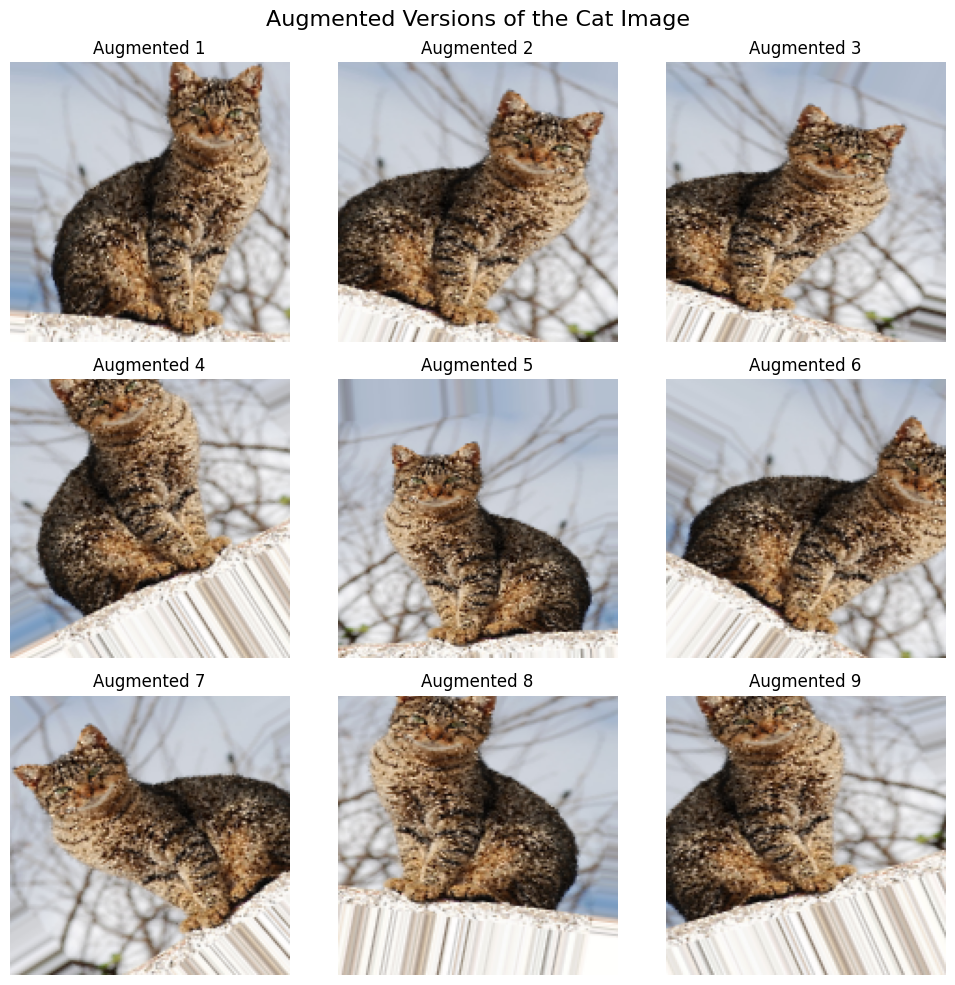

In [8]:
plt.figure(figsize=(10, 10))
for i, img_array in enumerate(augmented_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f'Augmented {i+1}')
plt.suptitle("Augmented Versions of the Cat Image", fontsize=16)
plt.tight_layout()
plt.show()